## Load libraries and Google Drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os.path,os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import cv2
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')  # import data from drive

Mounted at /content/Drive


In [ ]:
import sys
sys.path.append('/content/drive/')
from google.colab.patches import cv2_imshow

# Read the Database and Create Labels

In [ ]:
etiquetas = pd.read_csv('/content/Drive/MyDrive/ISIC 2019/ISIC_2019_Training_GroundTruth.csv')

In [ ]:
print(etiquetas)

              image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]


In [ ]:
etiquetas['MEL'].value_counts()

0.0    20809
1.0     4522
Name: MEL, dtype: int64

In [ ]:
etiquetas['NV'].value_counts()

1.0    12875
0.0    12456
Name: NV, dtype: int64

In [ ]:
etiquetas['BCC'].value_counts()

0.0    22008
1.0     3323
Name: BCC, dtype: int64

In [ ]:
etiquetas['AK'].value_counts()

0.0    24464
1.0      867
Name: AK, dtype: int64

In [ ]:
etiquetas['BKL'].value_counts()

0.0    22707
1.0     2624
Name: BKL, dtype: int64

In [ ]:
etiquetas['DF'].value_counts()

0.0    25092
1.0      239
Name: DF, dtype: int64

In [ ]:
etiquetas['VASC'].value_counts()

0.0    25078
1.0      253
Name: VASC, dtype: int64

In [ ]:
etiquetas['SCC'].value_counts()

0.0    24703
1.0      628
Name: SCC, dtype: int64

In [ ]:
etiquetas['UNK'].value_counts()

0.0    25331
Name: UNK, dtype: int64

In [ ]:
new_dataframe = pd.DataFrame(etiquetas) 

In [ ]:
new_dataframe

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_dataframe2 = new_dataframe.pop('image')

In [ ]:
new_dataframe2

0        ISIC_0000000
1        ISIC_0000001
2        ISIC_0000002
3        ISIC_0000003
4        ISIC_0000004
             ...     
25326    ISIC_0073247
25327    ISIC_0073248
25328    ISIC_0073249
25329    ISIC_0073251
25330    ISIC_0073254
Name: image, Length: 25331, dtype: object

In [ ]:
new_dataframe

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
25326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_dataframe.pop('UNK')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25326    0.0
25327    0.0
25328    0.0
25329    0.0
25330    0.0
Name: UNK, Length: 25331, dtype: float64

In [ ]:
new_dataframe

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_dataframe.iloc[1850]

MEL     0.0
NV      0.0
BCC     0.0
AK      0.0
BKL     1.0
DF      0.0
VASC    0.0
SCC     0.0
Name: 1850, dtype: float64

In [ ]:
Label2019 = []

In [ ]:
for i in range(25331): #3574

  new_dataframe.iloc[i]
  val_preds = np.argmax(new_dataframe.iloc[i])
  Label2019.append(val_preds)

In [ ]:
Label2019[1850]

4

In [ ]:
print('total training cat images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/ISIC_2019_Training_Input/*')))

total training cat images : 25489


In [ ]:
datos = glob.glob('/content/Drive/MyDrive/ISIC 2019/ISIC_2019_Training_Input/*')

In [ ]:
print(datos[1])

/content/Drive/MyDrive/ISIC 2019/ISIC_2019_Training_Input/ISIC_0071711.jpg


In [ ]:
print(new_dataframe2.iloc[0])

ISIC_0000000


In [ ]:
print(new_dataframe2.iloc[10014])

ISIC_0031417


In [ ]:
a =  os.path.join( "/content/Drive/MyDrive/ISIC 2019/ISIC_2019_Training_Input/"+new_dataframe2.iloc[1] + ".jpg")
print(a)

/content/Drive/MyDrive/ISIC 2019/ISIC_2019_Training_Input/ISIC_0000001.jpg


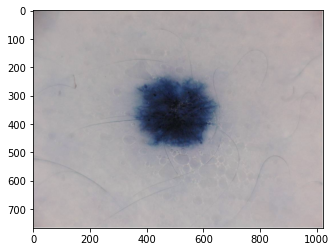

In [ ]:
imj = cv2.imread(a)
plt.imshow(imj)

#Divide the entire Database (8 Categories)

In [ ]:
con =0
con1 =0
con2 =0
con3 =0
con4 =0
con5 =0
con6 =0
con7 =0

for i in range(0,25331):
   b =  os.path.join("/content/Drive/MyDrive/ISIC 2019/ISIC_2019_Training_Input/"+new_dataframe2.iloc[i]+".jpg")
   imj = cv2.imread(b)
   if Label2019[i] == 0  :
      con+=1
      j= str(con)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL',"img" + j +".jpg"),imj)

   if Label2019[i] == 1  :
      con1+=1
      j= str(con1)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/NV',"img" + j +".jpg"),imj)

   if Label2019[i] == 2  :
      con2+=1
      j= str(con2)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC',"img" + j +".jpg"),imj)

   if Label2019[i] == 3  :
      con3+=1
      j= str(con3)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK',"img" + j +".jpg"),imj)

   if Label2019[i] == 4  :
      con4+=1
      j= str(con4)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL',"img" + j +".jpg"),imj)

   if Label2019[i] == 5  :
      con5+=1
      j= str(con5)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF',"img" + j +".jpg"),imj)

   if Label2019[i] == 6  :
      con6+=1
      j= str(con6)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC',"img" + j +".jpg"),imj)
      
   if Label2019[i] == 7  :
      con7+=1
      j= str(con7)
      cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC',"img" + j +".jpg"),imj)


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/*')))

total training Benigno images : 4521


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/NV/*')))

total training Benigno images : 12874


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/*')))

total training Benigno images : 3322


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/*')))

total training Benigno images : 867


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/*')))

total training Benigno images : 2624


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/*')))

total training Benigno images : 239


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/*')))

total training Benigno images : 253


In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/*')))

total training Benigno images : 628


## 8 Categories__Regularization of Data

In [ ]:
#We import some libraries to use in the process
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from imutils import paths
import numpy as np
import argparse

AK

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/*')))

total training Benigno images : 867


In [ ]:
dataset = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK'
output = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/AK'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 14:
            break

print('')            
print('This is complete!')

Loading images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/img1.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/img2.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/img3.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/img4.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/img5.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/img6.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/img7.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/T

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/AK/*')))

total training Benigno images : 7003


In [ ]:
train_malign = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/AK/*')


In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/AK',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/AK/*')))

total training Benigno images : 7870


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/AK/*')

In [10]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
validator = 0
for element in range(1000):
    a = a+1
    b = b +1
    c = c+1
   # src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        validator = validator +1
       # cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/AK',"img" + j3 +".jpg"),src)
    if b == 6 and c == 12 :
        b = b-1
        #print("F")
        #print(a,b,c)
        #print(a,b,c)
    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        validator = validator +1
        # cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/AK',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        validator = validator +1
       # cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/AK',"img" + j2 +".jpg"),src)

print(validator)

1000


In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/AK',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/AK',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/AK',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/AK/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/AK/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/AK/*')))

total training Benigno images : 5904
total training Benigno images : 1311
total training Benigno images : 655


BCC

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/*')))

total training Benigno images : 3322


In [ ]:
dataset = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC'
output = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BCC'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 4:
            break

print('')            
print('This is complete!')

Se han truncado las últimas 5000 líneas del flujo de salida.

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/img1979.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/img1980.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/img1981.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/img1982.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/img1983.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/img1984.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/img1985.jpg
Generating new images...

Data Augmentat

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BCC/*')))

total training Benigno images : 7483


In [ ]:
train_malign = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BCC/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BCC',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BCC/*')))

total training Benigno images : 10805


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BCC/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/BCC',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/BCC',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/BCC',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/BCC/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/BCC/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/BCC/*')))

total training Benigno images : 8105
total training Benigno images : 1800
total training Benigno images : 900


BKL

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/*')))

total training Benigno images : 2624


In [ ]:
dataset = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL'
output = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BKL'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 5:
            break

print('')            
print('This is complete!')

Se han truncado las últimas 5000 líneas del flujo de salida.

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/img2583.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/img2584.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/img2585.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/img2586.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/img2587.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/img2588.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/img2589.jpg
Generating new images...

Data Augmentat

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BKL/*')))

total training Benigno images : 7314


In [ ]:
train_malign = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/BKL/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BKL',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BKL/*')))

total training Benigno images : 9938


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/BKL/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/BKL',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/BKL',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/BKL',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/BKL/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/BKL/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/BKL/*')))

total training Benigno images : 7454
total training Benigno images : 1656
total training Benigno images : 828


DF

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/*')))

total training Benigno images : 239


In [ ]:
dataset = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF'
output = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/DF'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 53:
            break

print('')            
print('This is complete!')

Loading images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/img1.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/img2.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/img3.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/img4.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/img5.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/img6.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/img7.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/T

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/DF/*')))

total training Benigno images : 7198


In [ ]:
train_malign = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/DF/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/DF',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/DF/*')))

total training Benigno images : 7437


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/DF/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/DF',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/DF',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/DF',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/DF/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/DF/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/DF/*')))

total training Benigno images : 5579
total training Benigno images : 1239
total training Benigno images : 619


MEL

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/*')))

total training Benigno images : 4521


In [ ]:
dataset = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL'
output = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/MEL'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 3:
            break

print('')            
print('This is complete!')

Se han truncado las últimas 5000 líneas del flujo de salida.
Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/img1951.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/img1952.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/img1953.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/img1954.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/img1955.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/img1956.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/img1957.jpg
Generating new images...

Data Augmentati

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/MEL/*')))

total training Benigno images : 7126


In [ ]:
train_malign = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/MEL/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/MEL',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/MEL/*')))

total training Benigno images : 11647


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/MEL/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/MEL',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/MEL',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/MEL',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/MEL/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/MEL/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/MEL/*')))

total training Benigno images : 8736
total training Benigno images : 1941
total training Benigno images : 970


NV

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/NV/*')))

total training Benigno images : 12874


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/NV/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/NV',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/NV',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/NV',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/NV/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/NV/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/NV/*')))

total training Benigno images : 9657
total training Benigno images : 2145
total training Benigno images : 1072


SCC

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/*')))

total training Benigno images : 628


In [ ]:
dataset = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC'
output = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/SCC'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 20:
            break

print('')            
print('This is complete!')

Loading images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/img1.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/img2.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/img3.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/img4.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/img5.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/img6.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/img7.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categ

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/SCC/*')))

total training Benigno images : 7125


In [ ]:
train_malign = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/SCC/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/SCC',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/SCC/*')))

total training Benigno images : 7753


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/SCC/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/SCC',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/SCC',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/SCC',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/SCC/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/SCC/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/SCC/*')))

total training Benigno images : 5815
total training Benigno images : 1292
total training Benigno images : 646


VASC

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/*')))

total training Benigno images : 253


In [ ]:
dataset = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC'
output = '/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/VASC'

In [ ]:
#Grab the list of images from our dataset directory
print("Loading images...")
imagePaths = list(paths.list_images(dataset))
label='N'
#Make the processador for the images
aug = ImageDataGenerator(
	rotation_range=180,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True,
  vertical_flip=True,
	fill_mode="nearest")
aug_1= ImageDataGenerator(
	shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#loop over the image paths
for imagePath in imagePaths:
    image = load_img(imagePath)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    nombre = imagePath
    print('')
    print('Data Augmentation With: '+nombre)
    
    # construct the actual Python generator
    print("Generating new images...")
    imageGen = aug.flow(image, batch_size=64, save_to_dir= output,
                        save_prefix=label, save_format="png")

    #Loop over images from our image data augmentation generator
    total = 0
    for image in imageGen:
        #Increment our counter
        total += 1
        #If we have reached the specified number: total, break from the loop 2
        if total == 50:
            break

print('')            
print('This is complete!')

Loading images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/img1.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/img2.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/img3.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/img4.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/img5.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/img6.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/img7.jpg
Generating new images...

Data Augmentation With: /content/Drive/MyDrive/ISIC 2019/Base de Datos 

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/VASC/*')))

total training Benigno images : 7111


In [ ]:
train_malign = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train/VASC/*')

In [ ]:
a = 0

for element in train_malign:
    a = a+1
    src = cv2.imread(element)

    j= str(a)
    cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/VASC',"img" + j +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/VASC/*')))

total training Benigno images : 7364


In [ ]:
train_nv = glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_aumentadas/VASC/*')

In [ ]:
a = 0
b = 0
c = 0
b1 =0
c1 =0
c2 =0
for element in train_nv:
    a = a+1
    b = b +1
    c = c+1
    src = cv2.imread(element)

    if b!=6 and c!=12  :
        c2 = c2+1
        j3= str(c2)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/VASC',"img" + j3 +".jpg"),src)

    if b == 6 and c == 12 :
        b = b-1

    if b == 6 :
        b=0
        b1 = b1+1
        j1= str(b1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/VASC',"img" + j1 +".jpg"),src)
    if c == 12 :
        c=0
        c1 = c1+1
        j2= str(c1)
        cv2.imwrite(os.path.join('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/VASC',"img" + j2 +".jpg"),src)

In [ ]:
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Train_final/VASC/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Validation/VASC/*')))
print('total training Benigno images :', len(glob.glob('/content/Drive/MyDrive/ISIC 2019/Base de Datos 8_Categorias/Text/VASC/*')))

total training Benigno images : 5524
total training Benigno images : 1227
total training Benigno images : 613
